### Dawonload Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# IMPORT THE sklearn
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('data.csv')

### EDA

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,0
2,LP001256,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,0
3,LP002364,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban,1
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      534 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   551 non-null    float64
 10  Credit_History     516 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 57.4+ KB


In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,3
Dependents,11
Education,0
Self_Employed,30
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,13


In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")

Unique values in 'Loan_ID' column: ['LP001003' 'LP002926' 'LP001256' 'LP002364' 'LP001006' 'LP001760'
 'LP002916' 'LP002453' 'LP001585' 'LP002533' 'LP001322' 'LP002925'
 'LP002545' 'LP001131' 'LP001656' 'LP001713' 'LP001552' 'LP002537'
 'LP001996' 'LP001750' 'LP001225' 'LP001011' 'LP002317' 'LP001404'
 'LP001401' 'LP001357' 'LP001788' 'LP001776' 'LP002603' 'LP002794'
 'LP001806' 'LP002543' 'LP002284' 'LP002855' 'LP002119' 'LP002054'
 'LP001744' 'LP002693' 'LP001835' 'LP001267' 'LP001535' 'LP001572'
 'LP002043' 'LP002974' 'LP001263' 'LP001658' 'LP002836' 'LP001492'
 'LP001508' 'LP001790' 'LP002126' 'LP001491' 'LP001935' 'LP002519'
 'LP002841' 'LP001579' 'LP001743' 'LP002170' 'LP002424' 'LP001318'
 'LP002116' 'LP001977' 'LP001900' 'LP001319' 'LP002403' 'LP001488'
 'LP001520' 'LP002050' 'LP002387' 'LP002619' 'LP001489' 'LP001157'
 'LP002408' 'LP002625' 'LP001570' 'LP001439' 'LP002377' 'LP002301'
 'LP001370' 'LP002255' 'LP002398' 'LP002493' 'LP002149' 'LP002459'
 'LP002600' 'LP002868' 'LP0

### Clean Data

In [9]:
df = df.drop('Loan_ID', axis=1)

Fill categorical data by Mode()

```

```



In [10]:

def clean_categorical(dataframe, categorical_columns):
    for column in categorical_columns:

        mode = dataframe[column].mode()[0]
        dataframe[column] = dataframe[column].fillna(mode)

    return dataframe

categorical_columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']

df = clean_categorical(df, categorical_columns)


Fill numric data by median()


In [11]:

def clean_and_fill(dataframe, columns):
    for column in columns:
        dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

        median = dataframe[column].median()

        dataframe[column] = dataframe[column].fillna(median)

    return dataframe

columns = ['ApplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']

df = clean_and_fill(df, columns)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,0
2,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,0
3,Male,Yes,0,Graduate,No,14880,0.0,96.0,360.0,1.0,Semiurban,1
4,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    object 
 1   Married            564 non-null    object 
 2   Dependents         564 non-null    object 
 3   Education          564 non-null    object 
 4   Self_Employed      564 non-null    object 
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    object 
 11  Loan_Status        564 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 53.0+ KB


Encoding categorical data

In [14]:


categorical_columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area']

df = pd.get_dummies(df, columns=categorical_columns, )

print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             2726                0.0       106.0             360.0   
2             3750             4750.0       176.0             360.0   
3            14880                0.0        96.0             360.0   
4             2583             2358.0       120.0             360.0   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0             1.0            0          False         True       False   
1             0.0            0          False         True       False   
2             1.0            0          False         True        True   
3             1.0            1          False         True       False   
4             1.0            1          False         True       False   

   Married_Yes  ...  Education_Not Graduate  Dependents_0  Dependents_1  \
0         True  ...                   False         F

In [15]:

zero_coapplicant_income_count = (df['CoapplicantIncome'] == 0).sum()

print("Number of rows with zero in 'CoapplicantIncome':", zero_coapplicant_income_count)


Number of rows with zero in 'CoapplicantIncome': 248


### StandardScaler for Data

In [16]:
stand = StandardScaler()
df['ApplicantIncome'] = stand.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome'] = stand.fit_transform(df[['CoapplicantIncome']])
df['LoanAmount'] = stand.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = stand.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = stand.fit_transform(df[['Credit_History']])

### EDA after Cleaning and Scaling

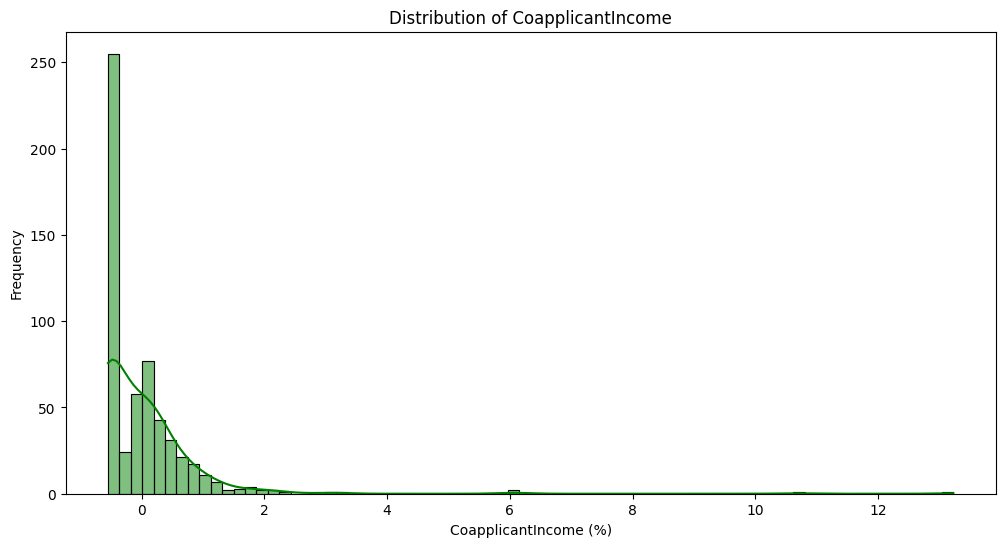

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['CoapplicantIncome'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of CoapplicantIncome')
plt.xlabel('CoapplicantIncome (%)')
plt.ylabel('Frequency')
plt.show()

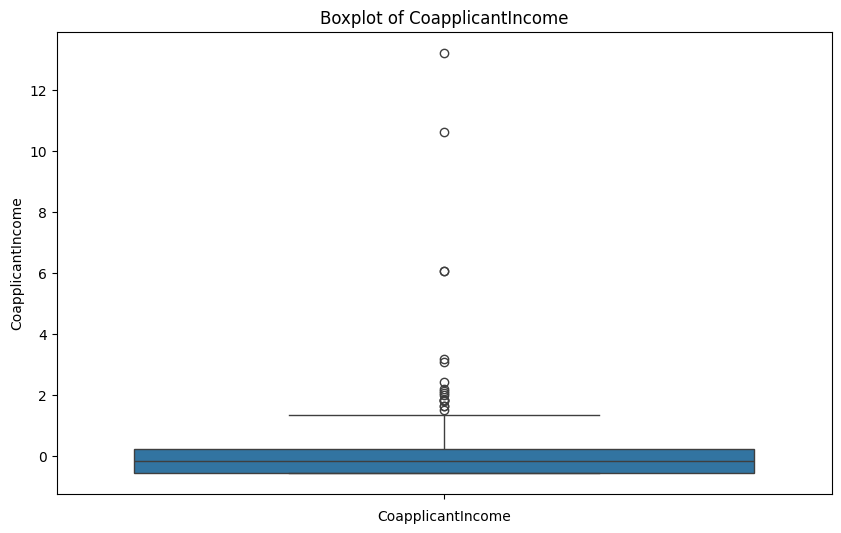

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.show()

In [19]:
#df = df[df['CoapplicantIncome'] <= 10]


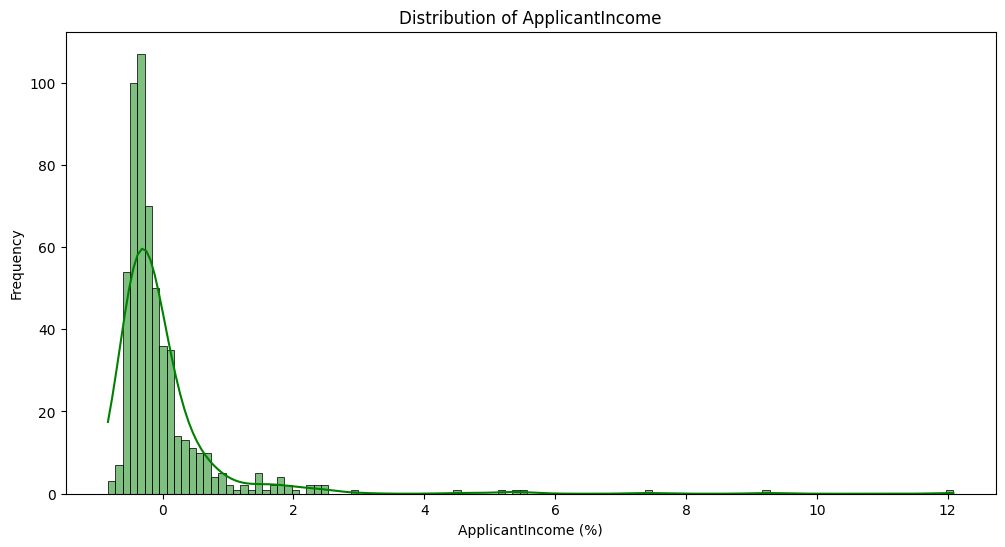

In [20]:

plt.figure(figsize=(12, 6))
sns.histplot(df['ApplicantIncome'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome (%)')
plt.ylabel('Frequency')
plt.show()

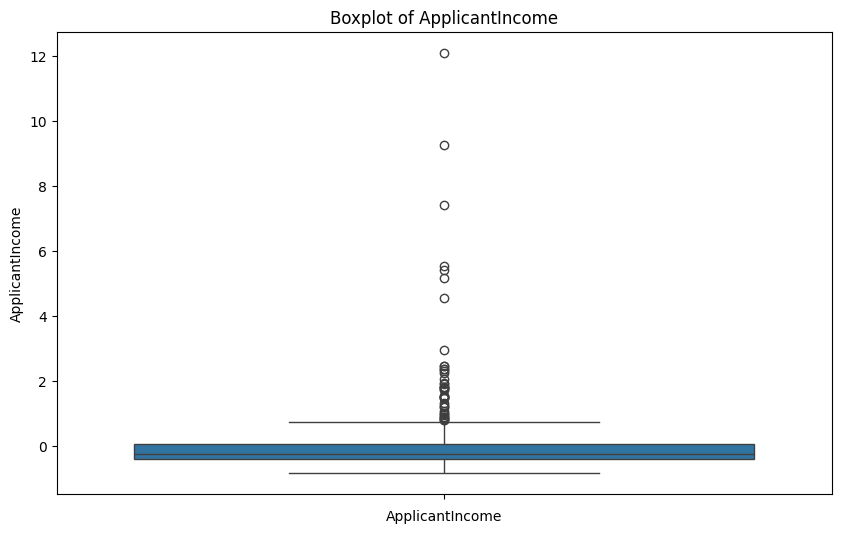

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.show()

In [22]:
#df = df[df['ApplicantIncome'] <= 6]

In [23]:
featurs = df.drop('Loan_Status', axis=1)
target = df['Loan_Status']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(featurs, target, test_size=0.2, random_state=23)


### SVC *model*

In [25]:
Model = svm.SVC(kernel='linear')
Model.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:

scores = cross_val_score(Model, featurs, target, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Score:", scores.mean())


Cross-Validation Scores: [0.83185841 0.82300885 0.80530973 0.78761062 0.80357143]
Average Score: 0.8102718078381794


In [26]:
svm_predictions = Model.predict(X_test)
acc = accuracy_score(y_test, svm_predictions)
print("Accuracy:", acc)

Accuracy: 0.8141592920353983


### LogisticRegression *model*

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8141592920353983


In [44]:
scoress = cross_val_score(model, featurs, target, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Score:", scoress.mean())

Cross-Validation Scores: [0.83185841 0.82300885 0.80530973 0.78761062 0.80357143]
Average Score: 0.8084860935524653


In [29]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.8093528693528693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  

In [30]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

In [31]:
modelLogisticRegression = LogisticRegression(C=0.01, penalty='l2', solver='saga')
modelLogisticRegression.fit(X_train, y_train)


LogisticRegression(C=0.01, solver='saga')

In [32]:
acccc = model.score(X_test, y_test)
print("Accuracy:", acccc)

Accuracy: 0.8141592920353983


### DecisionTreeClassifier model

In [33]:
mdl = DecisionTreeClassifier()
mdl.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
accur = model.score(X_test, y_test)
print("Accuracy:", accur)

Accuracy: 0.8141592920353983


### RandomForestClassifier model with

In [41]:
Mod = RandomForestClassifier()
Mod.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
ACC = Mod.score(X_test, y_test)
print("Accuracy:", ACC)

Accuracy: 0.8141592920353983


In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=Mod, param_grid=param_grid, cv= 5)
grid_search.fit(X_train, y_train)


Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validated score: 0.8093528693528693


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [38]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [39]:
ßgrid_search.best_score_

0.8093528693528693